# Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge, LinearRegression
from sklearn import metrics

# Loading the data...

In [2]:
Air2019 = pd.read_csv("/Users/adam/Documents/My DS Projects/datasets/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

Air2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
print(Air2019.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


# What is this data?

This data details AirBnb's listings within 2019 in NYC. The kaggle site is <a href=https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data>here</a>.

## Features:
<ul>
    <li><b>id:</b> listing ID</li>
    <li><b>name:</b> name of the listing</li>
    <li><b>host_id:</b> host ID</li>
    <li><b>host_name:</b> name of the host</li>
    <li><b>neighbourhood_group:</b> location(Boroughs)</li>
    <li><b>neighbourhood:</b> area(Neighborhoods)</li>
    <li><b>latitude:</b> latitude coordinates</li>
    <li><b>longitude:</b> longitude coordinates</li>
    <li><b>room_type:</b> listing space type</li>
    <li><b>price:</b> price per night in dollars</li>
    <li><b>minimum_nights:</b> amount of nights minimum</li>
    <li><b>number_of_reviews:</b> number of reviews</li>
    <li><b>last_review:</b> date of last review</li>
    <li><b>reviews_per_month:</b> number of reviews per month</li>
    <li><b>calculated_host_listings_count:</b> amount of listing per host</li>
    <li><b>availability_365:</b> number of days when listing is available for booking</li>
</ul>

# What can we learn about different hosts and areas?

1. What is the the most expensive borough to rent from?
2. What borough is the most booked?
3. What is the distribution of the different space types by each borough?

## What is the the most expensive borough to rent from?

In [4]:
df1 = Air2019.loc[:, ['id', 'name', 'neighbourhood_group', 'neighbourhood',
                        'room_type', 'price', 'minimum_nights', 'calculated_host_listings_count',
                        'availability_365']]
df1.head()

,id,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,Private room,149,1,6,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,225,1,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,3,1,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89,1,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80,10,1,0


In [5]:
dfcost = df1.loc[:, ['neighbourhood_group', 'price']]
avgdfcost = dfcost.groupby(['neighbourhood_group']).mean()
avgdfcost

,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


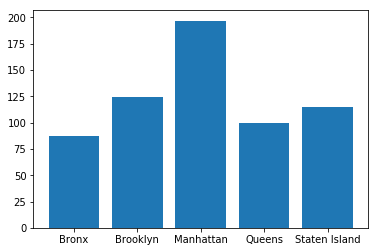

In [6]:
dfcost_values = avgdfcost.reset_index().values
bouroughs = np.array([dfcost_values[i, 0] for i in range(dfcost_values.shape[0])])
avg_price = np.array([dfcost_values[i, 1] for i in range(dfcost_values.shape[0])])

plt.bar(bouroughs, avg_price)
plt.show()

### Answer:
As we see from above, Manhattan is the most expensive place to rent from. I grouped the dataframe by its borough and calculated the mean price per night for each borough.

## What bourough is the most booked?

In [7]:
# Creating a new DataFrame to compare which the booking rates of each borough
dfaval = df1.loc[:, ['neighbourhood_group', 'availability_365']]
avg_dfaval = dfaval.groupby(['neighbourhood_group']).mean().sort_values('availability_365')
avg_dfaval

,availability_365
neighbourhood_group,
Brooklyn,100.232292
Manhattan,111.979410
Queens,144.451818
Bronx,165.758937
Staten Island,199.678284


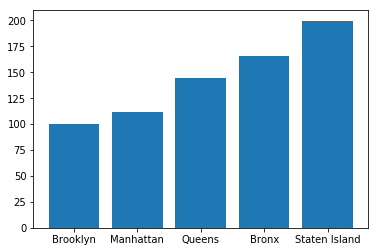

In [8]:
avg_dfaval_values = avg_dfaval.reset_index().values
borough = np.array([avg_dfaval_values[i, 0] for i in range(avg_dfaval_values.shape[0])])
avg_aval = np.array([avg_dfaval_values[i, 1] for i in range(avg_dfaval_values.shape[0])])

plt.bar(borough, avg_aval)
plt.show()

### Answer:
I took the average of the availabity rate per each borough, and we see that Brooklyn is where most Airbnb customers rent, which is not as expensive as Manhattan from above. Therefore, Brooklyn is the most popular borough to rent in NYC!

## What is the distribution of the different space types by each bourough?

In [9]:
dfRoomType = df1.loc[:, ['neighbourhood_group', 'room_type']]
dfRoomType = dfRoomType.groupby(['neighbourhood_group', 'room_type']).agg({'room_type':['count']})['room_type']
dfRoomType

count
neighbourhood_group room_type             
Bronx               Entire home/apt    379
                    Private room       652
                    Shared room         60
Brooklyn            Entire home/apt   9559
                    Private room     10132
                    Shared room        413
Manhattan           Entire home/apt  13199
                    Private room      7982
                    Shared room        480
Queens              Entire home/apt   2096
                    Private room      3372
                    Shared room        198
Staten Island       Entire home/apt    176
                    Private room       188
                    Shared room          9

In [10]:
def display_distribution(neighborhood, dataframe):
    dfRoom = dataframe.loc[neighborhood].reset_index().values
    print(dfRoom)
    room_type = np.array([dfRoom[i, 0] for i in range(dfRoom.shape[0])])
    counts = np.array([dfRoom[i, 1] for i in range(dfRoom.shape[0])])
    
    print('\nTotal number of listings: ', np.sum(counts))
    plt.bar(room_type, counts)
    plt.title('Room Types for {}'.format(neighborhood))
    plt.ylabel('Counts')
    plt.show()

### Distribution of space types in the Bronx

As we see below, the most Airbnb listings are private rooms.<br>

<b>Total listings:</b> 1091

Counts:
<ul>
    <li><b>Entire home/apt:</b> 379</li>
    <li><b>Private room:</b> 652</li>
    <li><b>Shared room:</b> 60</li>
</ul>

[['Entire home/apt' 379]
 ['Private room' 652]
 ['Shared room' 60]]

Total number of listings:  1091


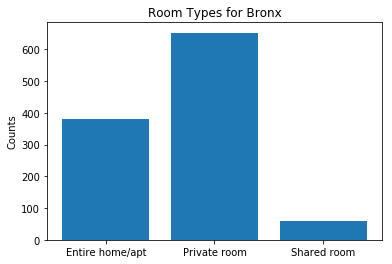

In [11]:
display_distribution('Bronx', dfRoomType)

### Distribution of space types in Brooklyn

There is a total of 20,104 listings in Brooklyn. We also observe that most listings are private rooms, however there is a considerate amount of entire homes and apartments.<br>

<b>Total listings:</b> 20,104

Counts:
<ul>
    <li><b>Entire home/apt:</b> 9,559</li>
    <li><b>Private room:</b> 10,132</li>
    <li><b>Shared room:</b> 413</li>
</ul>

[['Entire home/apt' 9559]
 ['Private room' 10132]
 ['Shared room' 413]]

Total number of listings:  20104


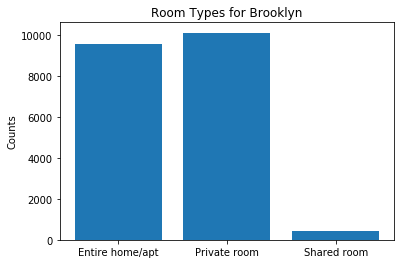

In [12]:
display_distribution('Brooklyn', dfRoomType)

### Distribution of space types in Manhattan

There is a total of 21,661 listings in Manhattan. Most listings are entire homes and apartments, and unlike Brooklyn, there is a great difference between entire spaces and private rooms.<br>

<b>Total listings:</b> 21,661

Counts:
<ul>
    <li><b>Entire home/apt:</b> 13,199</li>
    <li><b>Private room:</b> 7,982</li>
    <li><b>Shared room:</b> 480</li>
</ul>

[['Entire home/apt' 13199]
 ['Private room' 7982]
 ['Shared room' 480]]

Total number of listings:  21661


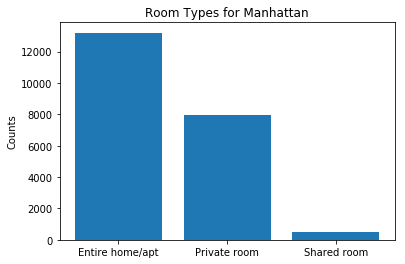

In [13]:
display_distribution('Manhattan', dfRoomType)

### Distribution of space types in Queens

There is a total of 5,666 listings in Queens. Most listings are private rooms.<br>

<b>Total listings:</b> 5,666

Counts:
<ul>
    <li><b>Entire home/apt:</b> 2,096</li>
    <li><b>Private room:</b> 3,372</li>
    <li><b>Shared room:</b> 198</li>
</ul>

[['Entire home/apt' 2096]
 ['Private room' 3372]
 ['Shared room' 198]]

Total number of listings:  5666


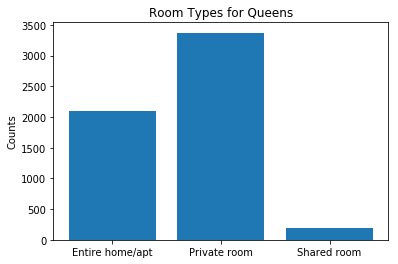

In [14]:
display_distribution('Queens', dfRoomType)

### Distribution of space types in Staten Island

There is a total of 373 listings in Staten Island, which is considerably lower than the other bouroughs. Most listings are private rooms, but there just as much entire homes and aparments as well.<br>

<b>Total listings:</b> 373

Counts:
<ul>
    <li><b>Entire home/apt:</b> 176</li>
    <li><b>Private room:</b> 188</li>
    <li><b>Shared room:</b> 9</li>
</ul>

[['Entire home/apt' 176]
 ['Private room' 188]
 ['Shared room' 9]]

Total number of listings:  373


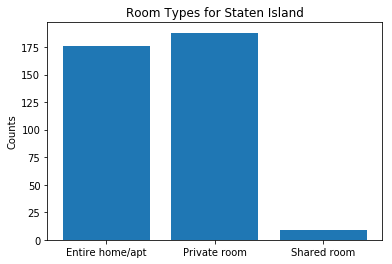

In [15]:
display_distribution('Staten Island', dfRoomType)

# Lets explore Brooklyn

I calculated the average unbooked days by each borough, and Brooklyn had the lowest average. Therefore I concluded that Brooklyn must be the highest sought after borough in NYC. I want to explore what makes Brooklyn attractive

In [16]:
BrooklynDF = Air2019.loc[Air2019.neighbourhood_group=='Brooklyn', :]
BrooklynDF.drop('neighbourhood_group', inplace=True, axis=1)
BrooklynDF.head()

/Users/adam/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
6,5121,BlissArtsSpace!,7356,Garon,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46


In [17]:
BrooklynDF.shape

(20104, 15)

There are 20,104 AirBnb listings in Brooklyn!

In [18]:
len(BrooklynDF.neighbourhood.unique())

47

There are 47 neighbourhoods in Brooklyn

In [19]:
BrooklynDF['neighbourhood'].value_counts()

Williamsburg                 3920
Bedford-Stuyvesant           3714
Bushwick                     2465
Crown Heights                1564
Greenpoint                   1115
Flatbush                      621
Clinton Hill                  572
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Sunset Park                   390
Prospect Heights              357
South Slope                   284
Gowanus                       247
Carroll Gardens               233
East New York                 218
Boerum Hill                   177
Kensington                    175
Sheepshead Bay                164
Windsor Terrace               157
Brooklyn Heights              154
Canarsie                      147
Bay Ridge                     141
Borough Park                  136
Cypress Hills                 135
Midwood                       109
Cobble Hill                    99
Flatlands                      83
Downtown Brook

The top five neighbourhoods that have the most listings are:

1. Williamsburg: 3920
2. Bedford-Stuyvesant: 3714
3. Bushwick: 2465
4. Crown Heights: 1564
5. Greenpoint: 1115

## What Brooklyn neighborhoods are the most expensive?

In [20]:
BrooklynDF.loc[:, ['neighbourhood', 'price']].groupby(['neighbourhood']).mean().nlargest(5, 'price')

,price
neighbourhood,
Sea Gate,487.857143
Cobble Hill,211.929293
Brooklyn Heights,209.064935
DUMBO,196.305556
Vinegar Hill,187.176471


Above are the top five most expensive neighborhoods in Brooklyn. The price column contains the average of the prices in those neighborhoods.

## What Brooklyn neighborhoods are the cheapest?

In [21]:
BrooklynDF.loc[:, ['neighbourhood', 'price']].groupby(['neighbourhood']).mean().nsmallest(5, 'price')

,price
neighbourhood,
Borough Park,63.066176
Bensonhurst,75.786667
Brownsville,76.459016
Gravesend,79.014706
Midwood,80.339450


Above are the top five cheapest neighborhoods in Brooklyn. The price column contains the average prices in those neighborhoods.

## Lets predict the price of Airbnbs in Brooklyn

I will build a Ridge Linear Regression model to predict the prices of a listing according to the features below:

<ol>
    <li><b>neighbourhood:</b> neighbourhood in Brooklyn</li>
    <li><b>latitude:</b> latitude coordinates</li>
    <li><b>longitude:</b> longitude coordinates</li>
    <li><b>room_type:</b> listing space type</li>
    <li><b>availability_365:</b> number of days when listing is available for booking</li>
</ol>

We will be predicting the prices of these observations.<br>
Read using sklearn's Ridge Model <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge'>here</a>.

I will use the metric, **MSPE(Mean Squared Prediction Error)**, to measure the performance of the model

In [22]:
LinearBrook = BrooklynDF.loc[:, ['neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'availability_365']]
LinearBrook.head()

,neighbourhood,latitude,longitude,room_type,price,availability_365
0,Kensington,40.64749,-73.97237,Private room,149,365
3,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,194
6,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0
12,South Slope,40.66829,-73.98779,Private room,89,314
15,Williamsburg,40.70837,-73.95352,Entire home/apt,140,46


Before proceeding, it is best to check if there are any null values within the data. Which there are not any according to the cell below.

In [23]:
LinearBrook.isna().sum().sum()

0

In [24]:
Y = LinearBrook.price
X = LinearBrook.drop('price', axis=1)

In [25]:
# OneHot encoding the neighbourhood column
oneHot = pd.get_dummies(X['neighbourhood'])
X.drop(['neighbourhood'], axis=1, inplace=True)
X = X.join(oneHot)

# OneHot encoding the room_type column
RoomOneHot = pd.get_dummies(X['room_type'])
X.drop(['room_type'], axis=1, inplace=True)
X = X.join(RoomOneHot)

# Normalize the data
X = (X-X.mean())/X.std()

In [26]:
#Test set will have 0.25 of the original data
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [27]:
#Finding the best model using these alpha values
alphas = [0.001,0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
MSPE = []

for alpha_val in alphas:
    print('Alpha: {}'.format(alpha_val))
    model = Ridge(alpha=alpha_val)
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    mspe = metrics.mean_squared_error(y_true = y_test, y_pred = y_preds)
    print('MSPE: {}'.format(mspe))
    MSPE.append(mspe)
    
MSPE = np.array(MSPE)
best_alpha_idx = np.argmin(MSPE)
print('The best alpha is: {}'.format(alphas[best_alpha_idx]))

Alpha: 0.001
MSPE: 25409.353639320958
Alpha: 0.01
MSPE: 25409.353986667113
Alpha: 0.1
MSPE: 25409.35745840414
Alpha: 0.2
MSPE: 25409.361312213725
Alpha: 0.3
MSPE: 25409.36516215587
Alpha: 0.4
MSPE: 25409.369008232712
Alpha: 0.5
MSPE: 25409.37285044636
Alpha: 0.6
MSPE: 25409.37668879894
Alpha: 0.7
MSPE: 25409.38052329257
Alpha: 0.8
MSPE: 25409.38435392938
Alpha: 0.9
MSPE: 25409.388180711503
Alpha: 1.0
MSPE: 25409.392003641038
The best alpha is: 0.001


The best alpha is 0.001 that gave us the lowest MSPE (Mean Squared Prediction Error) error.

In [28]:
#Creating the Ridge model with alpha=1.0
model = Ridge(alpha=0.001)

In [29]:
model.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
y_preds = model.predict(X_test)

In [31]:
mspe = metrics.mean_squared_error(y_true = y_test, y_pred = y_preds)
print('The MSPE of the Ridge Model is {}'.format(mspe))

The MSPE of the Ridge Model is 25409.353639320958


## Building a regular Linear Regression Model

Scikit Learn's Regression Model <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>here</a>.

In [32]:
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
Linear_preds = LinearModel.predict(X_test)

In [34]:
LinearMSPE = metrics.mean_squared_error(y_true = y_test, y_pred = Linear_preds)
print('The MSPE of the Ridge Model is {}'.format(LinearMSPE))

The MSPE of the Ridge Model is 25408.934150983292


## Ridge Regression Model vs Linear Regression Model

I will compare the MSPE values of each to determine what model performed better

In [35]:
if LinearMSPE < mspe:
    print('Linear Regression performed better!')
    diff = mspe - LinearMSPE
else:
    print('Ridge Regression performed better!')
    diff = LinearMSPE - mspe
print('The difference between the two MSPEs is {}'.format(diff))

Linear Regression performed better!
The difference between the two MSPEs is 0.4194883376658254


## The Linear Regression performed better!

## Now what features lead to the prices of the Airbnb listings?

One positive of having the Linear Regression is that the model is unbiased, therefore the coefficients of the model determine what features are most important.

In [36]:
LinearModel.coef_

array([ 2.27467382e+01, -1.28524563e+01,  1.55277479e+01,  4.27801475e+12,
        1.22823859e+13,  5.71176990e+13,  8.97264617e+12,  3.28165919e+12,
        1.37488974e+13,  1.20641580e+13,  8.97264617e+12,  1.28319331e+13,
        8.09480810e+12,  4.82731589e+13,  1.25391060e+13,  1.57524496e+13,
        2.44698693e+13,  1.03026074e+13,  6.72004274e+12,  4.27801475e+12,
        3.94215337e+13,  1.20200236e+13,  6.22248092e+12,  9.43717929e+12,
        3.59469862e+12,  2.29201590e+13,  1.52427119e+13,  2.54644319e+13,
        9.43717929e+12,  2.26729935e+13,  7.68755046e+12,  1.62130817e+13,
        8.54516090e+12,  3.36859468e+13,  1.36716854e+13,  2.93535128e+12,
        1.08077236e+13,  2.07581335e+12,  3.88252502e+12,  2.30537411e+13,
        1.94377033e+13,  2.36876231e+13,  9.20788920e+12,  2.74583801e+12,
        1.32386828e+13,  1.73688583e+13,  2.02992483e+13,  6.04746581e+12,
        5.83104302e+13,  1.29553424e+13, -7.53505198e+13, -7.54389188e+13,
       -2.14025560e+13])

In [37]:
asc_indices = np.argsort(LinearModel.coef_)

In [38]:
# Top Five Positive Coefficients
top_5Coef = asc_indices[48:]
LinearModel.coef_[top_5Coef]

array([3.36859468e+13, 3.94215337e+13, 4.82731589e+13, 5.71176990e+13,
       5.83104302e+13])

In [39]:
# Top Five Features that lead to the increase of the price of Airbnb Listings
X.columns[top_5Coef]

Index(['Greenpoint', 'Crown Heights', 'Bushwick', 'Bedford-Stuyvesant',
       'Williamsburg'],
      dtype='object')

The top five features that increase the price of the Airbnb Brooklyn listings are:

1. **Greenpoint**
2. **Crown Heights**
3. **Bushwick**
4. **Bedford-Stuyvesant**
5. **Williamsburg**

These are all Neighborhoods!

In [40]:
# The worst 5 Coefficient
bad_5Coef = asc_indices[0:5]
LinearModel.coef_[bad_5Coef]

array([-7.54389188e+13, -7.53505198e+13, -2.14025560e+13, -1.28524563e+01,
        1.55277479e+01])

As we see above, there are four negative coefficient.

In [41]:
# Let's see what feature decreases the price of an Airbnb listing
neg_index = bad_5Coef[0:4]
X.columns[neg_index]

Index(['Private room', 'Entire home/apt', 'Shared room', 'longitude'], dtype='object')

The features that leads to the price decreasing is:
1. **Private room**
2. **Entire home/apt**
3. **Shared room**
4. **longitutde**

A private room and an entire home/apt decreases the price about the same much. However, the shared room does not decreases the price as much as a private room or a home/apt.

Longitude is measured from the north-south direction. So when longitude increases, it is progessing in the southern direction.

Therefore, the price of Airbnb listings in Brooklyn decrease the more south you go. Which means that the travel to the inner NYC city increases as you progress more south.

# So what did we learn from the Linear Regression Model

### For Customers:

From the exploration of the coefficients, we can say that there is a clear relationship that the closer you are to the bridges that cross from Brooklyn to Manhattan, the more expensive it would be. This is proven by the inverse relationship of the longitude and the price shows that the price will decrease as the longitude increases. Also, it is best to get a private room or an entire home/apt.

### For Hosts:

As from the information from above, if you have property closer to the bridges that cross into Manhattan, you can charge more for your property.